In [4]:
import pandas as pd
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("historical_weather2006-2021.csv")
print (df)

                               dt_iso  timezone  city_name        lat  \
0       2006-01-01 00:00:00 +0000 UTC      7200  Jerusalem  31.768319   
1       2006-01-01 01:00:00 +0000 UTC      7200  Jerusalem  31.768319   
2       2006-01-01 02:00:00 +0000 UTC      7200  Jerusalem  31.768319   
3       2006-01-01 03:00:00 +0000 UTC      7200  Jerusalem  31.768319   
4       2006-01-01 04:00:00 +0000 UTC      7200  Jerusalem  31.768319   
...                               ...       ...        ...        ...   
135253  2021-06-01 19:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135254  2021-06-01 20:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135255  2021-06-01 21:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135256  2021-06-01 22:00:00 +0000 UTC     10800  Jerusalem  31.768319   
135257  2021-06-01 23:00:00 +0000 UTC     10800  Jerusalem  31.768319   

             lon   temp  feels_like  temp_min  temp_max  pressure  ...  \
0       35.21371  11.82       10.15     10.30    

##### Examine Data Statistics

In [6]:
df.describe()

,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,135258.000000,1.352580e+05,1.352580e+05,135258.000000,135258.000000,135258.000000,135258.000000,135258.000000,0.0,0.0,135258.000000,135258.000000,135258.000000,5571.000000,0.0,0.0,0.0,135258.000000,135258.000000
mean,9144.869804,3.176832e+01,3.521371e+01,20.759142,19.043397,18.295088,23.865457,1013.389093,NaN,NaN,55.385079,3.142870,216.107683,0.700646,NaN,NaN,NaN,17.354027,785.650438
std,1794.167367,1.153926e-11,9.543335e-11,6.597897,7.716325,6.931393,6.696944,5.443154,NaN,NaN,21.627439,1.714639,100.410866,0.954464,NaN,NaN,NaN,2719.012089,64.045310
min,7200.000000,3.176832e+01,3.521371e+01,0.770000,-2.460000,-1.800000,3.980000,949.000000,NaN,NaN,3.000000,0.020000,0.000000,0.100000,NaN,NaN,NaN,-999900.000000,200.000000
25%,7200.000000,3.176832e+01,3.521371e+01,15.460000,12.800000,12.700000,18.270000,1010.000000,NaN,NaN,39.000000,2.060000,130.000000,0.250000,NaN,NaN,NaN,0.000000,800.000000
50%,10800.000000,3.176832e+01,3.521371e+01,21.060000,19.060000,18.660000,24.000000,1013.000000,NaN,NaN,56.000000,3.000000,251.000000,0.500000,NaN,NaN,NaN,20.000000,800.000000
75%,10800.000000,3.176832e+01,3.521371e+01,26.090000,25.640000,23.900000,29.000000,1017.000000,NaN,NaN,72.000000,4.100000,300.000000,0.810000,NaN,NaN,NaN,40.000000,802.000000
max,10800.000000,3.176832e+01,3.521371e+01,39.920000,39.440000,37.000000,44.440000,1036.000000,NaN,NaN,100.000000,23.100000,360.000000,39.880000,NaN,NaN,NaN,100.000000,804.000000


##### Drop all NaN Columns

In [7]:
for col in df.columns:
    if df[col].count() == 0:
        print(col)
        df.drop(col,axis='columns',inplace=True)

sea_level
grnd_level
rain_3h
snow_1h
snow_3h


##### Drop Columns with Only One Unique Value

In [8]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)
        df.drop(col,axis='columns',inplace=True)

city_name
lat
lon


##### Keep only independent and relevant variables

In [9]:
cols_to_drop = ['feels_like','timezone','weather_id','weather_icon','weather_description','weather_main'] 
df.drop(cols_to_drop,axis='columns',inplace=True)

##### Fix date

In [10]:
df['dt_iso'] = df['dt_iso'].apply(lambda x: x.split(' ')[0])

In [11]:
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

##### fill NaN in rain_1h with 0

In [12]:
df['rain_1h'].fillna(0,inplace=True)

##### Group by Date

In [13]:
group_df = df.groupby('dt_iso',as_index=False).mean()

In [14]:
for i in group_df.index:
    group_df.loc[i+1,'yesterday'] = group_df.loc[i, 'rain_1h']

In [15]:
group_df.dropna(inplace=True)

##### Drop Date column

In [16]:
group_df.drop('dt_iso', axis=1, inplace=True)

##### Normalize

In [17]:
norm_df = pd.DataFrame(normalize(group_df,axis=1),index=group_df.index,columns=group_df.columns)

In [18]:
print (norm_df)

          temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
1     0.014811  0.012895  0.016841  0.985442  0.060431    0.002238  0.156734   
2     0.015956  0.010923  0.019431  0.996029  0.028503    0.003500  0.076772   
3     0.017134  0.011403  0.020185  0.993132  0.031371    0.008685  0.096274   
4     0.017300  0.013553  0.020091  0.986498  0.049392    0.002432  0.153037   
5     0.014820  0.012393  0.017301  0.961909  0.064172    0.002233  0.262378   
...        ...       ...       ...       ...       ...         ...       ...   
5626  0.023375  0.021113  0.027410  0.977054  0.064675    0.003274  0.198256   
5627  0.022058  0.019577  0.026175  0.978469  0.067959    0.003193  0.190655   
5628  0.023437  0.021358  0.027082  0.982943  0.057123    0.003102  0.169508   
5629  0.027074  0.024522  0.031246  0.985626  0.049883    0.003454  0.153801   
5630  0.023179  0.020464  0.027352  0.981482  0.061102    0.002893  0.176428   

      rain_1h  clouds_all  yesterday  


## ML Model

### Linear Regression

##### For rain amount

In [212]:
features = norm_df[[col for col in norm_df if col != 'rain_1h']]
output = norm_df['rain_1h']

In [213]:
x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

In [214]:
model = LinearRegression()

In [215]:
model.fit(x_train,y_train)

LinearRegression()

In [216]:
pd.DataFrame(model.coef_,index=features.columns,columns=['Coef'])

,Coef
temp,-0.023741
temp_min,0.001742
temp_max,0.020095
pressure,-0.001239
humidity,0.000711
wind_speed,0.026493
wind_deg,-0.000324
clouds_all,0.001114
yesterday,0.285871


In [217]:
y_pred = model.predict(x_test)

In [218]:
model.score(x_test,y_test)

0.37020400975537926

In [219]:
models = []
r2 = []

for i in range(1500):
    features = norm_df[[col for col in norm_df if col != 'rain_1h']]
    output = norm_df['rain_1h']

    x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

    model = LinearRegression()

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    score = model.score(x_test,y_test)
    
    models.append(model)
    r2.append(score)

##### For is rain

In [226]:
group_df['rain_1h'].apply(lambda x: x>0)

1       False
2       False
3        True
4       False
5       False
        ...  
5626    False
5627    False
5628    False
5629    False
5630    False
Name: rain_1h, Length: 5630, dtype: bool

In [230]:
models = []
r2 = []

for i in range(100):
    features = norm_df[[col for col in norm_df if col != 'rain_1h']]
    output = group_df['rain_1h'].apply(lambda x: x>0)

    x_train, x_test, y_train, y_test = train_test_split(features,output,test_size = 0.2)

    model = LinearRegression()

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)

    score = model.score(x_test,y_test)
    
    models.append(model)
    r2.append(score)

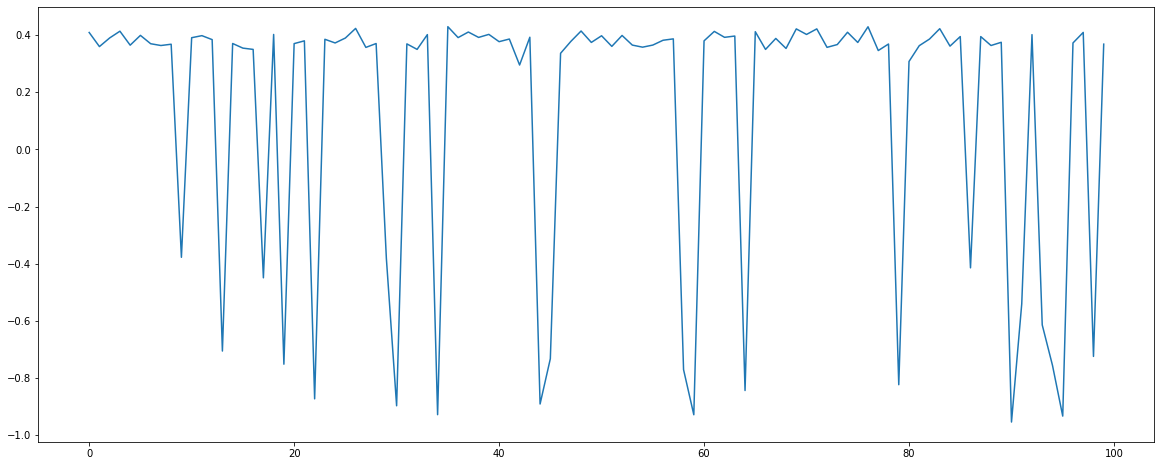

In [231]:
plt.subplots(figsize=(20,8))
plt.plot(r2)